In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
%matplotlib inline

In [3]:
def kmeans(data, k, max_iterations):
    
    centroids = data[np.linspace(0, len(data)-1, k, dtype=int)]
    
    for i in range(max_iterations):
        
        labels = np.argmin(((data - centroids[:, np.newaxis])**2).sum(axis=2), axis=0)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [4]:
def scatter2d(data, x_d, y_d, _min=-10, _max=10):
    plt.rcParams['figure.facecolor'] = '0.2'
    plt.axes().set_facecolor('black')
    x = data[:, x_d]
    y = data[:, y_d]
    plt.scatter(x, y, c='green')
    plt.xlabel(f"d{x_d}")
    plt.ylabel(f"d{y_d}")
    plt.xlim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    plt.ylim(data[:, x_d].min()+_min, data[:, x_d].max()+_max)
    plt.show()

In [5]:
def scatter3d(data, x_dim, y_dim, z_dim, _min=-10, _max=10):
    x = data[:, x_dim]
    y = data[:, y_dim]
    z = data[:, z_dim]
    fig = plt.figure()
    fig.patch.set_facecolor('0.2')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('0.2')
    ax.scatter(x, y, z, c='black')
    ax.set_xlabel(f"d{x_dim}")
    ax.set_ylabel(f"d{y_dim}")
    ax.set_zlabel(f"d{z_dim}")
    ax.set_xlim(data[:, x_dim].min()+_min, data[:, x_dim].max()+_max)
    ax.set_ylim(data[:, x_dim].min()+_min, data[:, x_dim].max()+_max)
    ax.set_zlim(data[:, x_dim].min()+_min, data[:, x_dim].max()+_max)    
    plt.show()

In [6]:
def _scatter2d(data, x_d, y_d, n_clusters, _min=-20, _max=20, colors=None):
    plt.rcParams['figure.facecolor'] = '0.2'
    plt.axes().set_facecolor('black')
    x = data[:, x_d]
    y = data[:, y_d]
    
    if colors is None:
        colors = ['green'] * n_clusters
    
    for i in range(n_clusters):
        idx = data[:, -1] == i
        plt.scatter(x[idx], y[idx], c=colors[i])

    plt.xlabel(f"d{x_d}")
    plt.ylabel(f"d{y_d}")
    plt.xlim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    plt.ylim(data[:, x_d].min()+_min, data[:, x_d].max()+_max)
    plt.show()

In [7]:
def _scatter3d(data, x_d, y_d, z_d, n_clusters, _min=-.2, _max=.2, colors=None):
    fig = plt.figure()
    fig.patch.set_facecolor('0.2')
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('0.2')
    x = data[:, x_d]
    y = data[:, y_d]
    z = data[:, z_d]
    
    if colors is None:
        colors = ['green'] * n_clusters
    
    for i in range(n_clusters):
        idx = data[:, -1] == i
        ax.scatter(x[idx], y[idx], z[idx], c=colors[i])
        
    ax.set_xlabel(f"d{x_d}")
    ax.set_ylabel(f"d{y_d}")
    ax.set_zlabel(f"d{z_d}")
    ax.set_xlim(data[:, x_d].min()+_min, data[:, x_d].max()+_max)
    ax.set_ylim(data[:, y_d].min()+_min, data[:, y_d].max()+_max)
    ax.set_zlim(data[:, z_d].min()+_min, data[:, z_d].max()+_max)
    plt.show()

In [8]:
data = np.random.randint(200, size=(200,2))
data[:10]

array([[ 24, 164],
       [ 36,  71],
       [159, 189],
       [ 50,  16],
       [148,  55],
       [143,  12],
       [105, 124],
       [ 56,  88],
       [ 81, 115],
       [ 20, 168]])

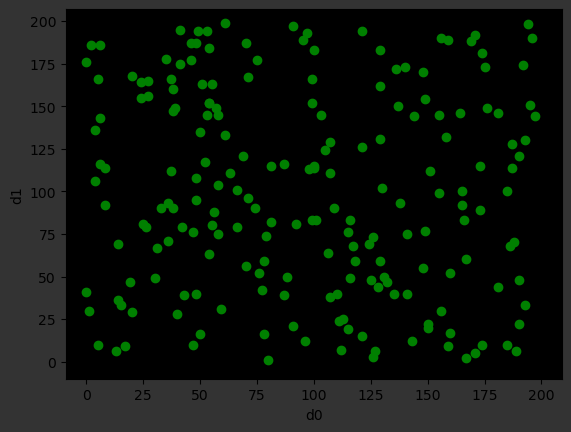

In [9]:
scatter2d(data, 0, 1)

In [10]:
labels, centroids = kmeans(data, 6, 50)

In [11]:
data_labeled = np.column_stack((data, labels))
data_labeled[:6]

array([[ 24, 164,   0],
       [ 36,  71,   5],
       [159, 189,   2],
       [ 50,  16,   5],
       [148,  55,   3],
       [143,  12,   3]], dtype=int64)

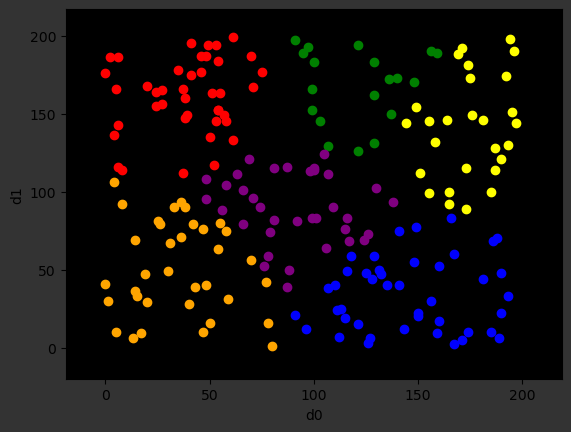

In [12]:
_scatter2d(data_labeled, 0, 1, 6, colors=['red','yellow', 'green', 'blue', 'purple', 'orange'])

In [13]:
data3d = np.random.randint(200, size=(200,3))
data3d[:10]

array([[  7,  40,   8],
       [139, 176,  95],
       [ 41, 190, 168],
       [113,  95, 132],
       [174, 146, 153],
       [118,  77, 136],
       [143,  77, 135],
       [  6, 181,  83],
       [167, 169, 134],
       [ 58, 112, 135]])

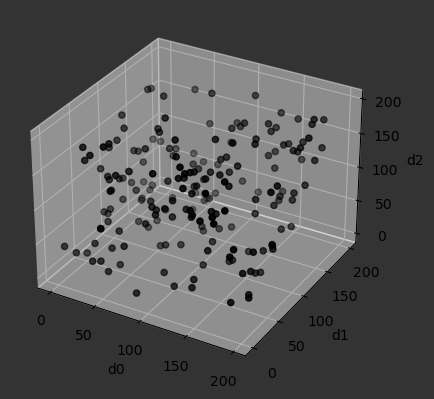

In [14]:
scatter3d(data3d,0,1,2)

In [15]:
labels2, centroids2 = kmeans(data3d, 5, 30)

In [16]:
data_labeled2 = np.c_[data3d, labels2]
data_labeled[:10]

array([[ 24, 164,   0],
       [ 36,  71,   5],
       [159, 189,   2],
       [ 50,  16,   5],
       [148,  55,   3],
       [143,  12,   3],
       [105, 124,   4],
       [ 56,  88,   4],
       [ 81, 115,   4],
       [ 20, 168,   0]], dtype=int64)

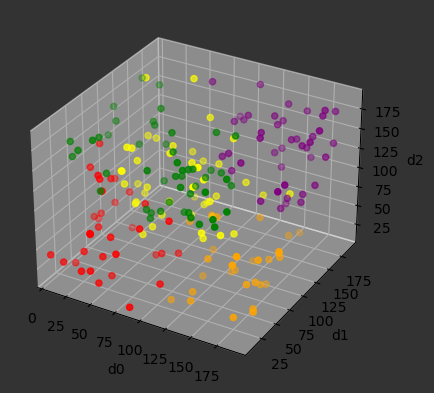

In [17]:
_scatter3d(data_labeled2, 0, 1, 2, 5, colors=['red', 'purple', 'green', 'yellow', 'orange'])

In [18]:
#%matplotlib notebook